In [ ]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

In [ ]:
##Read csv from path
dataset = pd.read_csv(r"C:\Users\15672\Desktop\knn_model\new_data.csv")

In [ ]:
##Check csv original
dataset.head()

,Route,Avg. 2011 Ridership,Avg. 2016 Ridership,Ridership Change %,# of Stops,# of Stops near Subway,Borough
0,BX1,38891,36487,-6%,47,19,Bronx
1,BX2,38891,36487,-6%,50,18,Bronx
2,BX3,15800,14921,-6%,28,3,Bronx
3,BX4,12141,11411,-6%,32,16,Bronx
4,BX4A,12141,11411,-6%,35,13,Bronx


In [ ]:
##Check modified csv after columns dropped
dataset.head()

,Avg. 2016 Ridership,# of Stops,# of Stops near Subway
0,36487,47,19
1,36487,50,18
2,14921,28,3
3,11411,32,16
4,11411,35,13


In [ ]:
##Split Data
X = dataset.drop('# of Stops near Subway', axis=1)
Y = dataset['# of Stops near Subway']

In [ ]:
##Check x and y
print(X)
print(Y)

     Avg. 2016 Ridership  # of Stops
0                  36487          47
1                  36487          50
2                  14921          28
3                  11411          32
4                  11411          35
..                   ...         ...
247                 4431          39
248                 3686          21
249                 7016          39
250                 7299          38
251                 7702          25

[252 rows x 2 columns]
0      19
1      18
2       3
3      16
4      13
       ..
247     0
248     1
249     0
250     0
251     0
Name: # of Stops near Subway, Length: 252, dtype: int64


C:\Users\15672\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


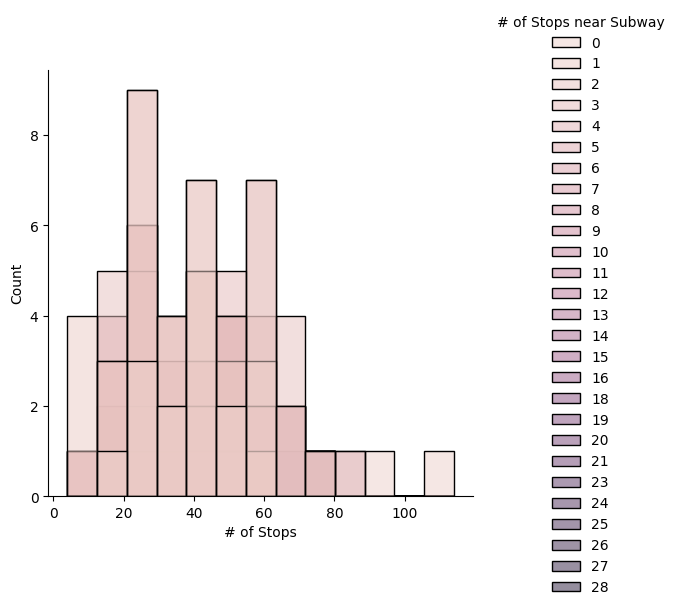

In [ ]:
##Visualize data
sns.displot(dataset, x = '# of Stops', hue = '# of Stops near Subway')

C:\Users\15672\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


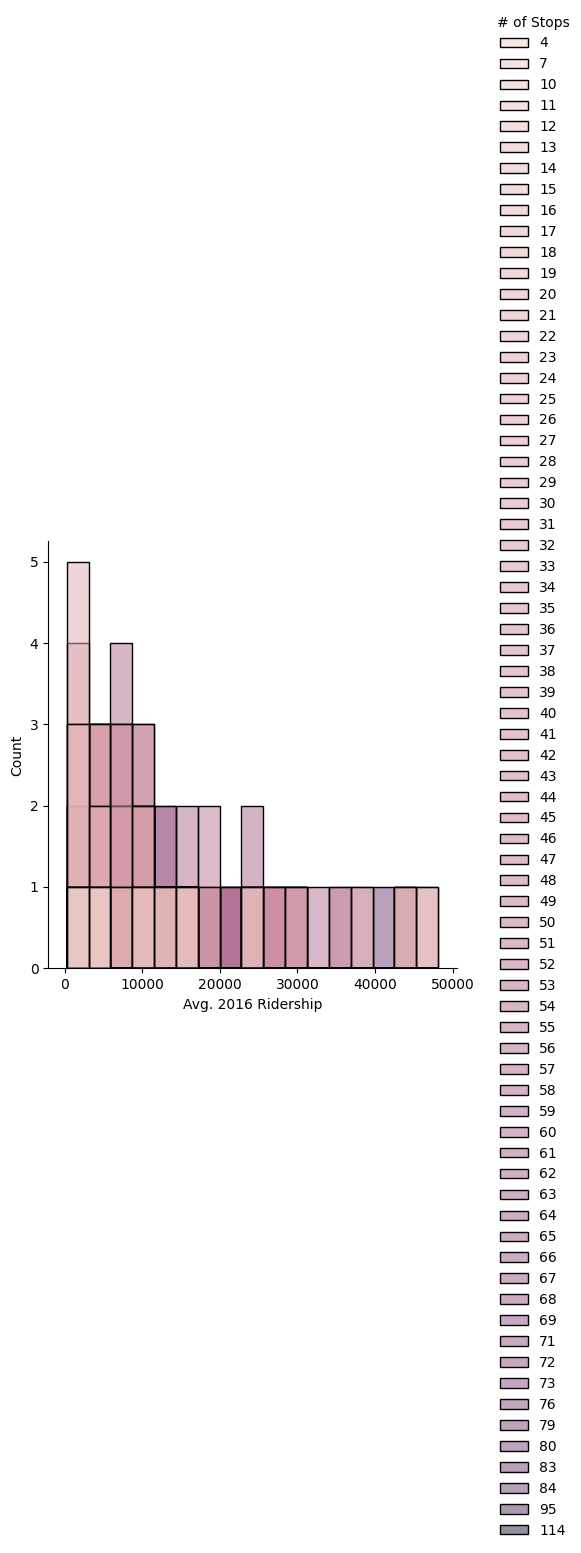

In [ ]:
##Visualize data
sns.displot(dataset, x = 'Avg. 2016 Ridership', hue = '# of Stops')

In [ ]:
##Ecilidean distance function by hand
def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum(pt1-pt2)**2)
    return distance
##test
a = np.array([3,4])
b = np.array([5,9])

print(euclidean_distance(a,b))

7.0


In [ ]:
#Knn by hand attempt
def KNN(X_train, X_test, Y_train, Y_test, k_val):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance(np.array(X_train.iloc[i]), test_pt))

            ##PROBLEM framing dataframe to size
            distance_data = pd.DataFrame(data = distances, columns=['distance'], index= Y_train.index)


            k_neighbors_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]

            labels = Y_train.loc[k_neighbors_list.index]

            voting = mode(labels).mode[0]

            y_hat.append(voting)
        return y_hat

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

In [ ]:
#making a list to store the error values for each k
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,Y_train)
pred_i = knn.predict(X_test)
error_rate.append(np.mean(pred_i != Y_test))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [ ]:
#Checking Accuracy score

print("The accuracy score is : ", accuracy_score(Y_test,y_pred))

The accuracy score is :  0.2698412698412698


In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 1, 3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)